In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data_test = pd.read_csv("C:/Users/komsv/Downloads/titanic/test.csv")
data_train = pd.read_csv("C:/Users/komsv/Downloads/titanic/train.csv")
data = data_train.append(data_test)

In [5]:
print(f"Розмір даних train {data_train.shape}")
print(f"Розмір даних test {data_test.shape}")

print ('Перші 5 рядків даних:') 
data_train.head ()

Розмір даних train (891, 12)
Розмір даних test (418, 11)
Перші 5 рядків даних:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data_test.head ()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
#перевірка на нуль
print(data_train.isnull().sum().sort_values(ascending=False)/len(data)*100)

Cabin          52.482811
Age            13.521772
Embarked        0.152788
Fare            0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
PassengerId     0.000000
dtype: float64


In [8]:
print(data_test.isnull().sum().sort_values(ascending=False)/len(data)*100)

Cabin          24.980901
Age             6.569901
Fare            0.076394
Embarked        0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
PassengerId     0.000000
dtype: float64


In [9]:
#перевірка на дублікати
data[data.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [10]:
features = ["Age","Embarked","Pclass","Sex","SibSp","Parch","Fare","Name","Ticket"]
y = data_train["Survived"]
reduced_data_train = data_train[features]
reduced_data_test = data_test[features]

In [11]:
reduced_data_train[["Age"]] = reduced_data_train[["Age"]].fillna(value=reduced_data_train[["Age"]].mean())
print(reduced_data_train[["Embarked"]].mode())
reduced_data_train[["Embarked"]] = reduced_data_train[["Embarked"]].fillna(value="S")

reduced_data_test[["Age","Fare"]] = reduced_data_test[["Age","Fare"]].fillna(value=reduced_data_test[["Age","Fare"]].mean())

  Embarked
0        S


In [12]:
print(reduced_data_train.isnull().sum().sort_values(ascending=False)/len(data)*100)

Ticket      0.0
Name        0.0
Fare        0.0
Parch       0.0
SibSp       0.0
Sex         0.0
Pclass      0.0
Embarked    0.0
Age         0.0
dtype: float64


In [13]:
print(reduced_data_test.isnull().sum().sort_values(ascending=False)/len(data)*100)

Ticket      0.0
Name        0.0
Fare        0.0
Parch       0.0
SibSp       0.0
Sex         0.0
Pclass      0.0
Embarked    0.0
Age         0.0
dtype: float64


In [14]:
#шукаємо категоріальні дані
reduced_data_train.dtypes

Age         float64
Embarked     object
Pclass        int64
Sex          object
SibSp         int64
Parch         int64
Fare        float64
Name         object
Ticket       object
dtype: object

In [15]:
reduced_data_train.select_dtypes(include=[object]).apply(pd.Series.nunique, axis = 0)

Embarked      3
Sex           2
Name        891
Ticket      681
dtype: int64

In [16]:
reduced_data_test.select_dtypes(include=[object]).apply(pd.Series.nunique, axis = 0)

Embarked      3
Sex           2
Name        418
Ticket      363
dtype: int64

In [17]:
#виділити імена як категоріальні, замінивши на скорочення
Title_Dictionary = {
    "Capt": "Сrew",
    "Col": "Сrew",
    "Major": "Сrew",
    "Jonkheer": "VIP",
    "Don": "VIP",
    "Sir" : "VIP",
    "Dr": "Сrew",
    "Rev": "Сrew",
    "the Countess":"VIP",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "VIP"
}

def get_titles(combined):
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    combined['Title'] = combined.Title.map(Title_Dictionary)
    return combined

In [18]:
reduced_data_train = get_titles(reduced_data_train)
reduced_data_test = get_titles(reduced_data_test)
del reduced_data_train['Name']
del reduced_data_test['Name']

reduced_data_test.head()

,Age,Embarked,Pclass,Sex,SibSp,Parch,Fare,Ticket,Title
0,34.5,Q,3,male,0,0,7.8292,330911,Mr
1,47.0,S,3,female,1,0,7.0000,363272,Mrs
2,62.0,Q,2,male,0,0,9.6875,240276,Mr
3,27.0,S,3,male,0,0,8.6625,315154,Mr
4,22.0,S,3,female,1,1,12.2875,3101298,Mrs


In [19]:
#виділити квитки як категоріальні
def convertTicket(combined):
 tickets=[]
 for prefix in combined['Ticket']:
  if prefix.isnumeric():
   tickets.append("None")
  else:
   tickets.append(prefix.split(' ')[0])
 return tickets

In [20]:
reduced_data_train["Ticket"] = convertTicket(reduced_data_train)
reduced_data_test["Ticket"] = convertTicket(reduced_data_test)

reduced_data_train.head()

,Age,Embarked,Pclass,Sex,SibSp,Parch,Fare,Ticket,Title
0,22.0,S,3,male,1,0,7.2500,A/5,Mr
1,38.0,C,1,female,1,0,71.2833,PC,Mrs
2,26.0,S,3,female,0,0,7.9250,STON/O2.,Miss
3,35.0,S,1,female,1,0,53.1000,None,Mrs
4,35.0,S,3,male,0,0,8.0500,None,Mr


In [21]:
reduced_data_train.select_dtypes(include=[object]).apply(pd.Series.nunique, axis = 0)

Embarked     3
Sex          2
Ticket      44
Title        6
dtype: int64

In [22]:
reduced_data_test.select_dtypes(include=[object]).apply(pd.Series.nunique, axis = 0)

Embarked     3
Sex          2
Ticket      35
Title        5
dtype: int64

In [23]:
reduced_data_train["Embarked"] = reduced_data_train["Embarked"].astype('category').cat.codes
reduced_data_test["Embarked"] = reduced_data_test["Embarked"].astype('category').cat.codes
reduced_data_train["Ticket"] = reduced_data_train["Ticket"].astype('category').cat.codes
reduced_data_test["Ticket"] = reduced_data_test["Ticket"].astype('category').cat.codes
reduced_data_train = pd.get_dummies(reduced_data_train)
reduced_data_test = pd.get_dummies(reduced_data_test)

reduced_data_train.head()

,Age,Embarked,Pclass,SibSp,Parch,Fare,Ticket,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_VIP,Title_Сrew
0,22.0,2,3,1,0,7.2500,4,0,1,0,0,1,0,0,0
1,38.0,0,1,1,0,71.2833,19,1,0,0,0,0,1,0,0
2,26.0,2,3,0,0,7.9250,38,1,0,0,1,0,0,0,0
3,35.0,2,1,1,0,53.1000,17,1,0,0,0,0,1,0,0
4,35.0,2,3,0,0,8.0500,17,0,1,0,0,1,0,0,0


In [24]:
X = reduced_data_train

<Figure size 864x864 with 0 Axes>

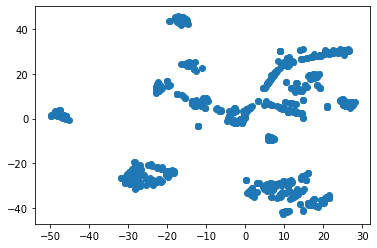

<Figure size 864x864 with 0 Axes>

In [25]:
#t-SNE і k-means
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
train_scaled = scaler.fit_transform(X)

tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(train_scaled)

plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1])
plt.figure(figsize=(12, 12))

In [26]:
def result_correctness_kmns(labels,link):
 true_positive = 0
 false_positive = 0
 false_negative = 0

 for i in range(len(labels)):
    if labels[i] == y[i] and y[i]==1:
        true_positive += 1
    elif labels[i] != y[i] and y[i]==1:
        false_positive += 1
    if labels[i] != y[i] and y[i]==0:
        false_negative += 1
        
 print(link)
 print(f"true_positive: {true_positive}")
 print(f"false_positive: {false_positive}")
 print(f"false_negative: {false_negative}")
 precision = true_positive/(true_positive + false_positive)
 recall = true_positive/(true_positive + false_negative)
 print(f"precision: {precision}")
 print(f"recall: {recall}")
 print(f"f1-score: {2*recall*precision/(recall+precision)}")

In [27]:
X = tsne_representation.astype(float)

In [28]:
def kmeans_cluster(max_it, n_in, tolerance):
  kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=max_it,
    n_clusters=2, n_init=n_in,
    random_state=None, tol=tolerance, verbose=0)
  kmeans.fit(X)
  return kmeans.labels_

50,1,0.01
true_positive: 263
false_positive: 79
false_negative: 112
precision: 0.7690058479532164
recall: 0.7013333333333334
f1-score: 0.7336122733612273
500,1,0.01
true_positive: 105
false_positive: 237
false_negative: 455
precision: 0.30701754385964913
recall: 0.1875
f1-score: 0.2328159645232816
5000,1,0.01
true_positive: 263
false_positive: 79
false_negative: 113
precision: 0.7690058479532164
recall: 0.699468085106383
f1-score: 0.7325905292479109
50,10,0.01
true_positive: 263
false_positive: 79
false_negative: 113
precision: 0.7690058479532164
recall: 0.699468085106383
f1-score: 0.7325905292479109
50,100,0.01
true_positive: 79
false_positive: 263
false_negative: 436
precision: 0.2309941520467836
recall: 0.1533980582524272
f1-score: 0.1843640606767795
5000,100,0.0001
true_positive: 263
false_positive: 79
false_negative: 113
precision: 0.7690058479532164
recall: 0.699468085106383
f1-score: 0.7325905292479109
5000,1,0.0001
true_positive: 79
false_positive: 263
false_negative: 436
preci

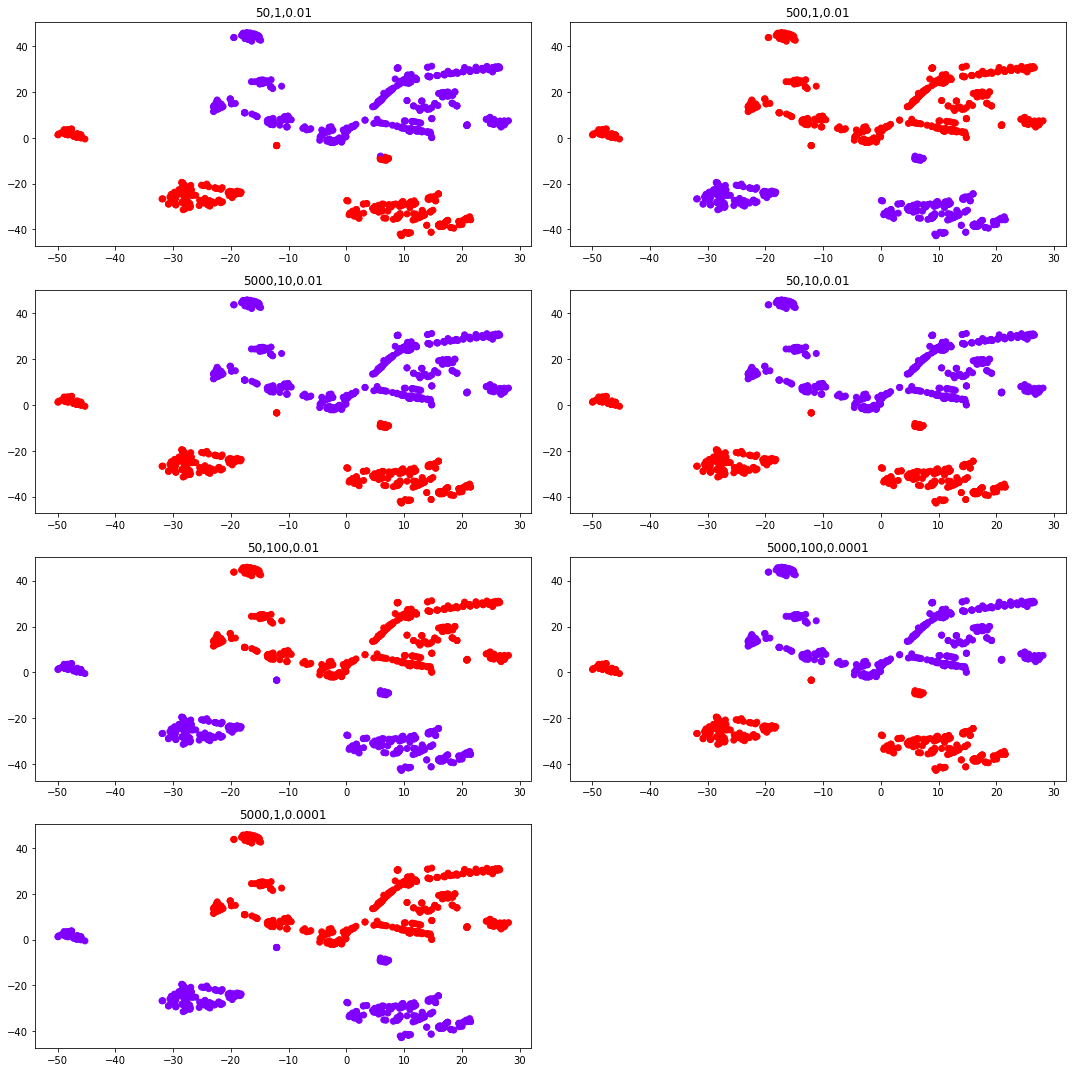

In [29]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.subplot(4, 2, 1)

result = kmeans_cluster(50,1,0.01)
plt.title('50,1,0.01')
plt.scatter(X[:,0],X[:,1], c=result, cmap='rainbow')

result_correctness_kmns(result,'50,1,0.01')
plt.subplot(4, 2, 2)
result = kmeans_cluster(500,1,0.01)
plt.title('500,1,0.01')
plt.scatter(X[:,0],X[:,1], c=result, cmap='rainbow')

result_correctness_kmns(result,'500,1,0.01')
plt.subplot(4, 2, 3)
result = kmeans_cluster(5000,1,0.01)
plt.title('5000,10,0.01')
plt.scatter(X[:,0],X[:,1], c=result, cmap='rainbow')

result_correctness_kmns(result,'5000,1,0.01')
plt.subplot(4, 2, 4)
plt.title('50,10,0.01')
result = kmeans_cluster(50,10,0.01)
plt.scatter(X[:,0],X[:,1], c=result, cmap='rainbow')

result_correctness_kmns(result,'50,10,0.01')
plt.subplot(4, 2, 5)
plt.title('50,100,0.01')
result = kmeans_cluster(50,100,0.01)
plt.scatter(X[:,0],X[:,1], c=result, cmap='rainbow')

result_correctness_kmns(result,'50,100,0.01')
plt.subplot(4, 2, 6)
plt.title('5000,100,0.0001')
result = kmeans_cluster(5000,100,0.0001)
plt.scatter(X[:,0],X[:,1], c=result, cmap='rainbow')

result_correctness_kmns(result,'5000,100,0.0001')
plt.subplot(4, 2, 7)
plt.title('5000,1,0.0001')
result = kmeans_cluster(5000,1,0.0001)
plt.scatter(X[:,0],X[:,1], c=result, cmap='rainbow')

result_correctness_kmns(result,'5000,1,0.0001')
fig.tight_layout()


plt.show()

<Figure size 864x864 with 0 Axes>

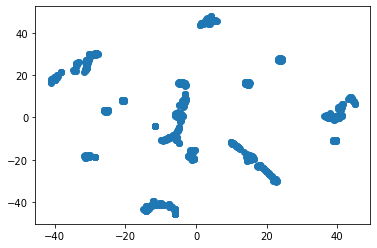

<Figure size 864x864 with 0 Axes>

In [30]:
#t-SNE і hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

train_full = X[:]
train_full = np.column_stack([train_full, y])

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_full)

tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(train_scaled)

plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1])
plt.figure(figsize=(12, 12))

In [31]:
def result_correctness_aggl(labels,link):
 true_positive = 0
 false_positive = 0
 false_negative = 0

 for i in range(len(labels)):
    if labels[i] == y[i] and y[i]==1:
        true_positive += 1
    elif labels[i] != y[i] and y[i]==1:
        false_positive += 1
    if labels[i] != y[i] and y[i]==0:
        false_negative += 1
 print(link)
 print(f"true_positive: {true_positive}")
 print(f"false_positive: {false_positive}")
 print(f"false_negative: {false_negative}")
 precision = true_positive/(true_positive + false_positive)
 recall = true_positive/(true_positive + false_negative)
 print(f"precision: {precision}")
 print(f"recall: {recall}")
 print(f"f1-score: {2*recall*precision/(recall+precision)}")

Single
true_positive: 23
false_positive: 319
false_negative: 17
precision: 0.06725146198830409
recall: 0.575
f1-score: 0.12041884816753926
Ward
true_positive: 87
false_positive: 255
false_negative: 451
precision: 0.2543859649122807
recall: 0.16171003717472118
f1-score: 0.19772727272727272
Average
true_positive: 87
false_positive: 255
false_negative: 451
precision: 0.2543859649122807
recall: 0.16171003717472118
f1-score: 0.19772727272727272
Complete
true_positive: 87
false_positive: 255
false_negative: 451
precision: 0.2543859649122807
recall: 0.16171003717472118
f1-score: 0.19772727272727272


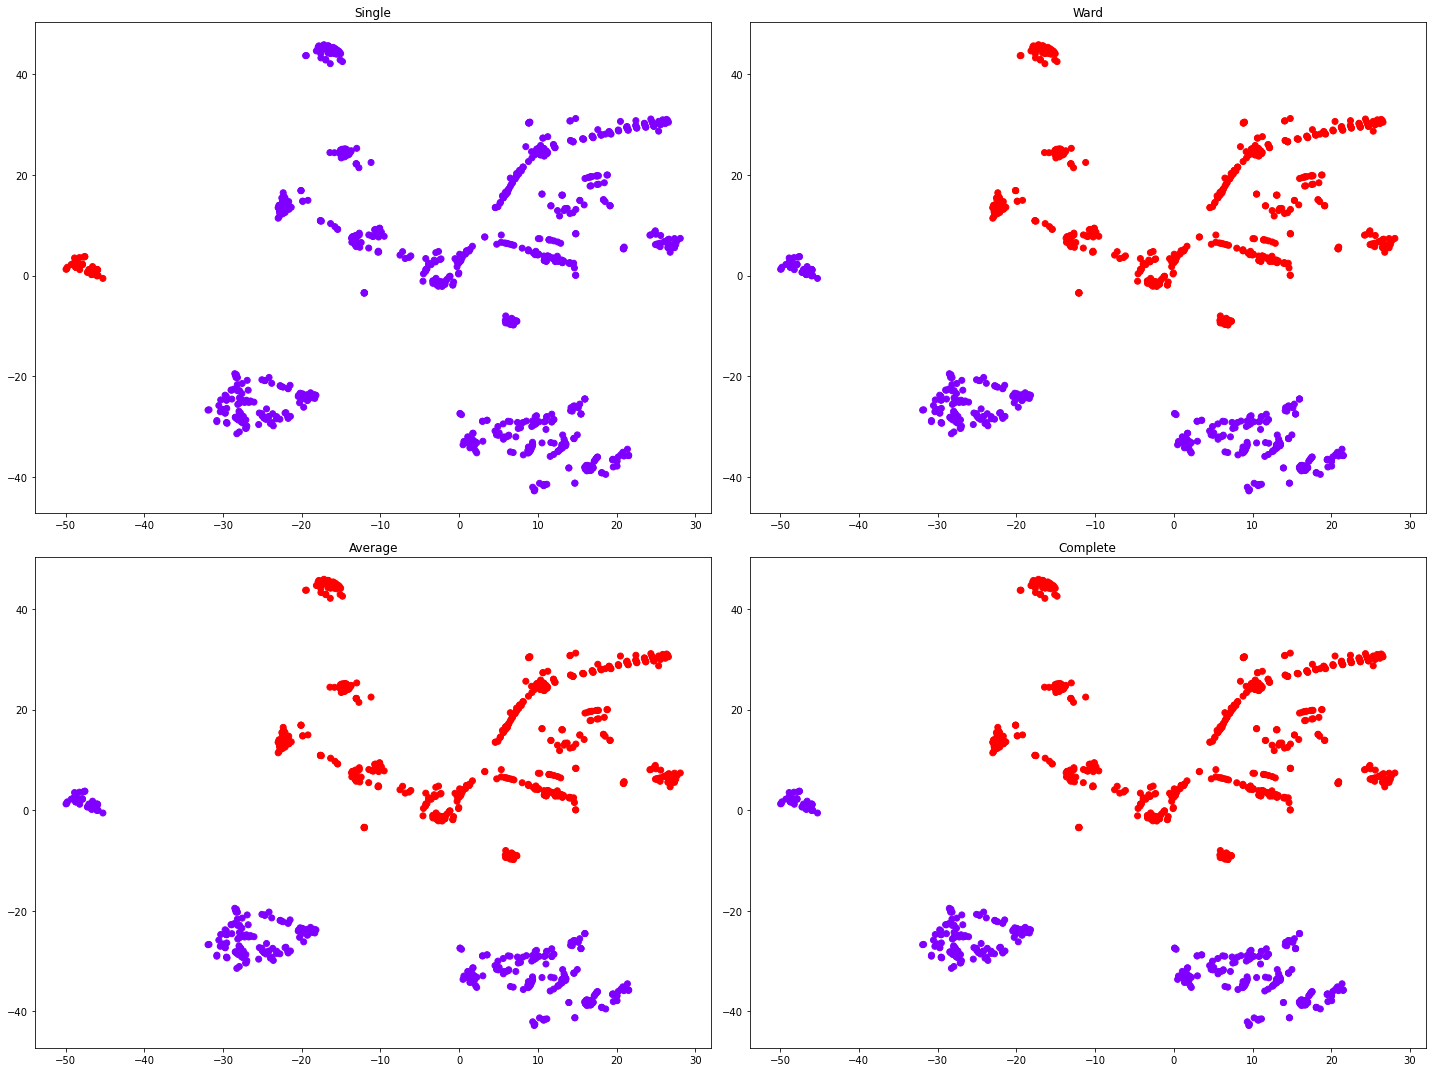

In [32]:
def agl_cluster(link):
 cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage=link)
 cluster.fit(X)
 return cluster.labels_

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(20)
plt.subplot(2, 2, 1)

result = agl_cluster('single')
plt.title("Single")
plt.scatter(X[:,0],X[:,1], c=result, cmap='rainbow')

result_correctness_aggl(result,"Single")
plt.subplot(2, 2, 2)
result = agl_cluster('ward')
plt.title("Ward")
plt.scatter(X[:,0],X[:,1], c=result, cmap='rainbow')

result_correctness_aggl(result,"Ward")
plt.subplot(2, 2, 3)
plt.title("Average")
result = agl_cluster('average')
plt.scatter(X[:,0],X[:,1], c=result, cmap='rainbow')

result_correctness_aggl(result,"Average")
plt.subplot(2, 2, 4)
plt.title("Complete")
result = agl_cluster('complete')
plt.scatter(X[:,0],X[:,1], c=result, cmap='rainbow')

result_correctness_aggl(result,"Complete")
fig.tight_layout()

plt.show()

<Figure size 864x864 with 0 Axes>

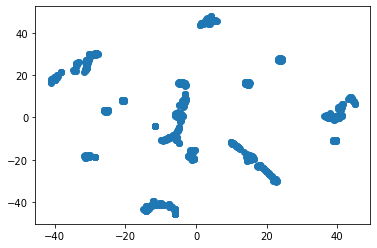

<Figure size 864x864 with 0 Axes>

In [33]:
#t-SNE і dbscan
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

train_full = X[:]
train_full = np.column_stack([train_full, y])

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_full)

tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(train_scaled)

plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1])
plt.figure(figsize=(12, 12))

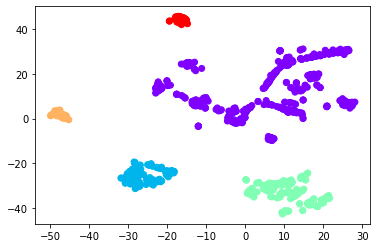

In [34]:
db = DBSCAN(eps=10, min_samples=2)
db.fit(X)
plt.scatter(X[:,0],X[:,1], c=db.labels_, cmap='rainbow')

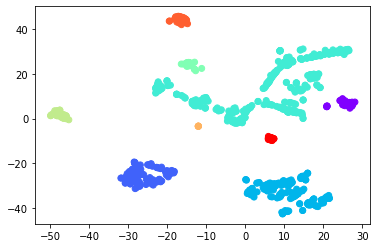

In [36]:
db = DBSCAN(eps=5, min_samples=2)
db.fit(X)
plt.scatter(X[:,0],X[:,1], c=db.labels_, cmap='rainbow')